In [1]:
"""
参考: https://www.kaggle.com/wakamezake/neural-networks-product-classification-otto
"""

import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

# dataset の読み込み
train_df = pd.read_csv('./data/train.csv')

display(train_df.head())
display(train_df.describe())
print(train_df.shape)

# 特微量の取り出し
columns = train_df.columns[1:-1]
print(columns)

# 訓練データ
X = train_df[columns]
y = train_df['target']
display(X.head())
display(y.head())

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
display("Train Set Shape: {}, Test Set Shape: {}".format(X_train.shape, X_test.shape))


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,0.303468,0.698019,0.451146,0.560829,0.238130,0.641375,0.249669,1.584893,0.348314,0.324283,0.053298,0.213485,0.442063,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,1.085672,1.961189,1.706013,1.346090,2.587131,2.348359,1.446203,2.577071,1.369380,1.720470,0.513820,1.044788,2.006485,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

(61878, 95)
Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

'Train Set Shape: (41458, 93), Test Set Shape: (20420, 93)'

In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
import math

col_size = X_train.shape[1]

diparameter = {
    "hidden_layer_sizes":[
        (col_size*2,),
        (col_size*4,),
        (col_size*6,),
        (col_size*8,),
        (col_size*10,)
    ],
    "activation": ["relu"], # "identity", "logistic", "tanh", "relu"
    'alpha': [0.001],
    "batch_size": [12],
    "max_iter":[5000],
    "early_stopping": [True],
    "shuffle": [True],
    "tol": [1e-5],
    "learning_rate": ['adaptive'], # "constant", "invscaling", "adaptive"
    "solver":["adam"] # "lbfgs", "sgd", "adam"
}

kfold = KFold(n_splits=8)
gs = GridSearchCV(
    MLPClassifier(),
    param_grid=diparameter,
    scoring="accuracy", # accuracy or f1 or precision
    cv=kfold,
    n_jobs=-1,
    iid=True,
    return_train_score=False
)

gs.fit(X_train,  y_train)

# 交差検証の表示
scores = cross_val_score(estimator=gs.best_estimator_, X=X_test, y=y_test, cv=kfold, n_jobs=-1)
print("Cross-Validation scores : {}\n".format(scores))
print("GridSearchCV best score: {}\n".format(gs.best_score_))
print("GridSearchCV best parameter: {}\n".format(gs.best_params_))
display(pd.DataFrame(gs.cv_results_))


Cross-Validation scores : [0.79005092 0.78535057 0.79710145 0.77477477 0.76998433 0.78644201
 0.78017241 0.78840125]

GridSearchCV best score: 0.8007380963867046

GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 12, 'early_stopping': True, 'hidden_layer_sizes': (930,), 'learning_rate': 'adaptive', 'max_iter': 5000, 'shuffle': True, 'solver': 'adam', 'tol': 1e-05}



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_shuffle,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,167.473989,42.840634,0.091181,0.042820,relu,0.001,12,True,"(186,)",adaptive,5000,True,adam,1e-05,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.796643,0.796064,0.797183,0.798533,0.789271,0.793902,0.795253,0.796604,0.795432,0.002652,5
1,256.240612,30.620368,0.127801,0.019292,relu,0.001,12,True,"(372,)",adaptive,5000,True,adam,1e-05,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.795099,0.792012,0.797761,0.799112,0.799884,0.783288,0.805288,0.799112,0.796445,0.006129,4
2,389.903723,54.448206,0.223165,0.085935,relu,0.001,12,True,"(558,)",adaptive,5000,True,adam,1e-05,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.796450,0.808605,0.796990,0.801042,0.794288,0.791972,0.801428,0.798726,0.798688,0.004793,2
3,602.690236,246.151265,0.225852,0.063136,relu,0.001,12,True,"(744,)",adaptive,5000,True,adam,1e-05,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.797993,0.795485,0.797183,0.803551,0.800849,0.799305,0.798726,0.791972,0.798133,0.003247,3
4,645.859339,216.300962,0.226574,0.070931,relu,0.001,12,True,"(930,)",adaptive,5000,True,adam,1e-05,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.802431,0.808605,0.802586,0.803358,0.789078,0.798340,0.800656,0.800849,0.800738,0.005205,1


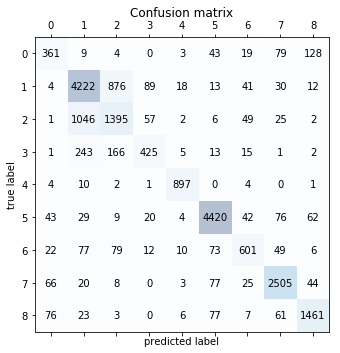

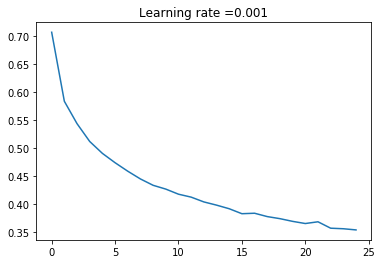

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import confusion_matrix

def plot_loss_curve(learning_rate, loss_data):
    plt.title("Learning rate =" + str(learning_rate))
    plt.plot(loss_data)
    plt.show()

def plot_confusion_matrix(estimator, X, y):
    y_pred = estimator.predict(X)
    confmat = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.tight_layout()
    plt.show()
    return confmat.ravel()

cls = gs.best_estimator_
# 混合行列の表示
plot_confusion_matrix(cls, X_test, y_test)

# ロス曲線の表示
plot_loss_curve(gs.best_params_['alpha'], cls.loss_curve_)

In [13]:
"""
testデータを使ってscoreを作成する
"""

test_df = pd.read_csv("./data/test.csv")
submit_df = pd.read_csv("./data/sampleSubmission.csv")

# score作成用結果ラベル
labels = np.unique(np.ravel(y))

# score用データ
_test = test_df[columns]

# テストデータを使ってどの出力ラベルになりうるか予測する
# predict_probaは出力ラベルそれぞれの確立を吐き出す
test_prob = cls.predict_proba(_test)

# 試しにあるデータの出力結果を見てみる
# 出力ラベルは 9種類のラベル
print(labels)
# それぞれ9種類のどれにあたるか、それぞれの確立が出力にあたる
print(test_prob[0])
# 今回の場合 class4 が予測結果になる
print("Class_{}".format(np.argmax(test_prob[0])+1))

submit_df[labels] = test_prob
display(submit_df.head())
submit_df.to_csv('./output/otto_prediction.csv', index = False)

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
[7.16454023e-05 3.70497544e-01 4.94623010e-02 5.74565127e-01
 2.55421708e-11 1.85561404e-07 5.40289656e-03 2.66771127e-07
 3.31614759e-08]
Class_4


,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,7.164540e-05,3.704975e-01,4.946230e-02,5.745651e-01,2.554217e-11,1.855614e-07,5.402897e-03,2.667711e-07,3.316148e-08
1,2,1.517352e-09,7.364216e-13,1.258205e-12,5.799287e-18,2.765635e-12,9.997724e-01,8.030796e-12,2.275558e-04,3.448218e-08
2,3,2.494565e-18,3.968968e-20,1.064288e-14,1.581149e-12,9.792551e-16,1.000000e+00,2.758330e-13,2.410715e-13,2.850719e-14
3,4,6.527183e-09,4.017604e-01,5.981448e-01,9.228460e-05,1.986062e-13,7.924070e-12,1.693785e-10,2.901881e-07,2.186163e-06
4,5,4.954140e-03,1.180631e-07,1.605311e-13,2.917859e-11,4.644065e-12,6.632321e-05,9.750955e-09,4.265245e-04,9.945529e-01
